Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print('Train size',train.shape)
print('Test size',test.shape)

Train size (1460, 81)
Test size (1459, 80)


In [4]:
df = pd.concat([train, test], sort = False, ignore_index = True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
df.shape

(2919, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

In [7]:
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts())

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Grvl    120
Pave     78
Name: Alley, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, 

Some Features have very low variance, i.e almost all the data points have same values, except for 2-3%, therefore, we will drop these features

In [8]:
df.drop(columns = ['Street','Utilities', 'Condition2', 'RoofMatl', 'Heating'],inplace=True)


## Missing values treatment

In [9]:
pd.DataFrame((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)).head(36)

,0
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
SalePrice,0.499829
FireplaceQu,0.486468
LotFrontage,0.166495
GarageYrBlt,0.054471
GarageFinish,0.054471
GarageQual,0.054471


We will drop all the features having null values more than 30%, as imputing more than 30% data can act as noise and can affect the model accuracy and reliability.

Also the features that have more than 30% missing data don't seem to be that important
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
Alley: Type of alley access to property
FireplaceQu: Fireplace quality

We generally don't check all these things while deciding the house of a price. So, we will simply drop these features.

LotFrontage: Linear feet of street connected to property : This feature also seems irrelevant to the problem we are trying to solve, also it has more than 15% of the missing data. So, we will drop this as well

Electrical feature only has 1 entry missing, so we will simply delete that entry.

GarageCond, GarageType, GarageYrBlt, GarageFinish, GarageQual has null values, where there is no garage, so we will replace them with 'NA'

For basement features, we will fill similarly as garage features.

For MasVnrType, if no value is provided, we will fill it with None and for Area, we will fill it with 0.

In [10]:
df.drop(columns = ['Id', 'PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu', 'LotFrontage'],inplace=True)
df.drop(df.loc[df['Electrical'].isna()].index, inplace=True)
df[['GarageType','GarageCond','GarageFinish','GarageQual']] = df[['GarageType','GarageCond','GarageFinish','GarageQual']].fillna('NA')
df[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']] = df[['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']].fillna('NA')
df[['MasVnrType','KitchenQual','SaleType','Exterior2nd']] = df[['MasVnrType','KitchenQual','SaleType','Exterior2nd']].fillna('NA')
df[['MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','BsmtFinSF1','GarageYrBlt']] = df[['MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageArea','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageCars','BsmtFinSF1','GarageYrBlt']].fillna(0.0)
df[['MSZoning','Functional','Exterior1st','Electrical']] = df[['MSZoning','Functional','Exterior1st','Electrical']].fillna('NA')

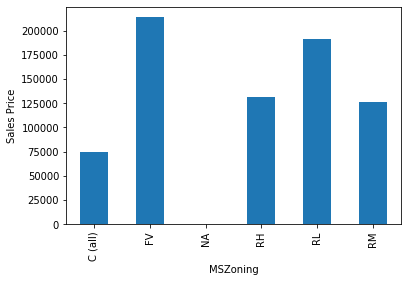

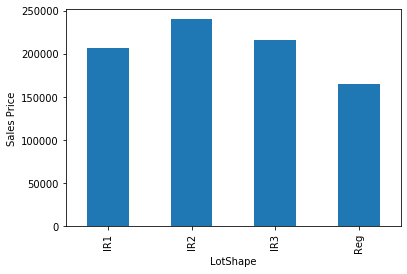

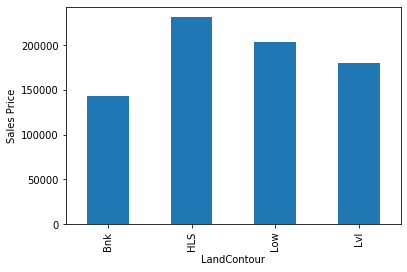

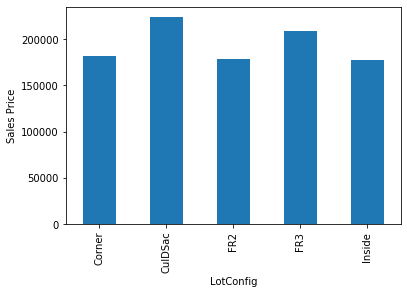

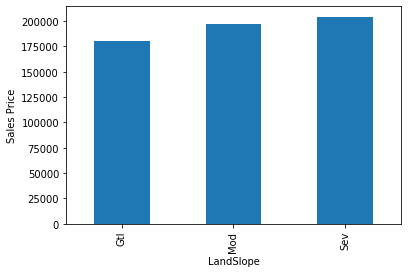

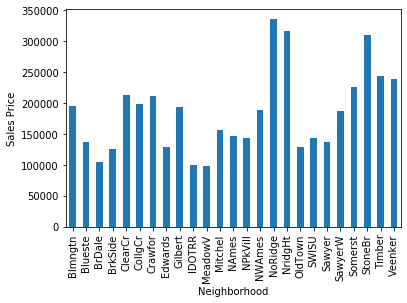

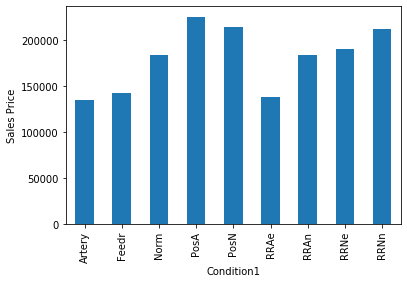

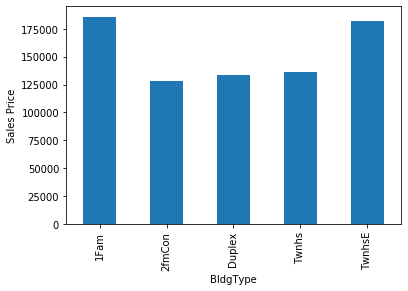

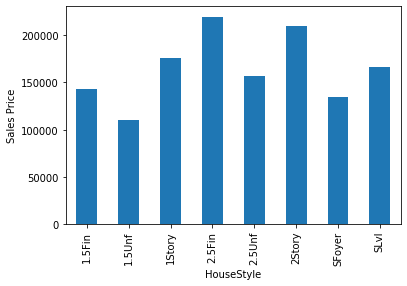

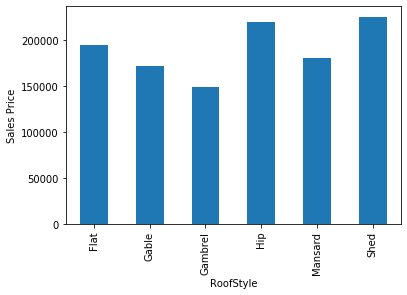

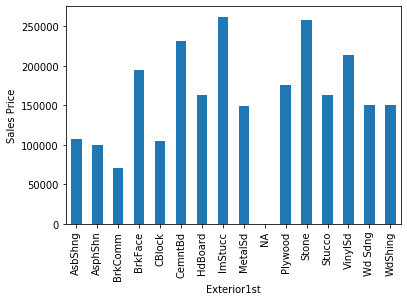

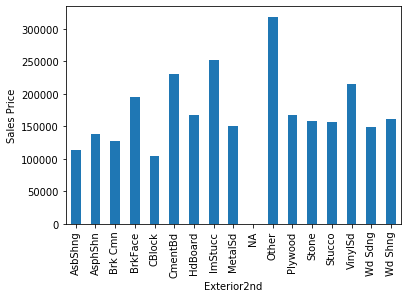

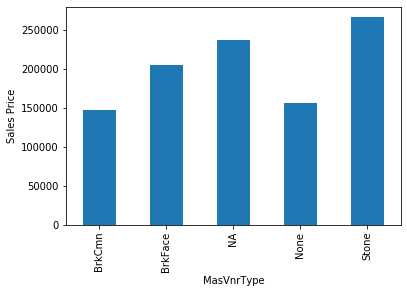

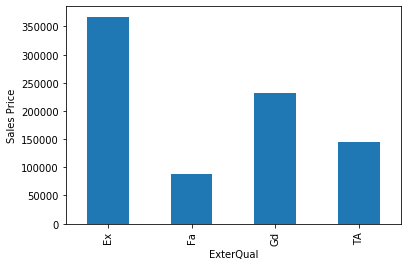

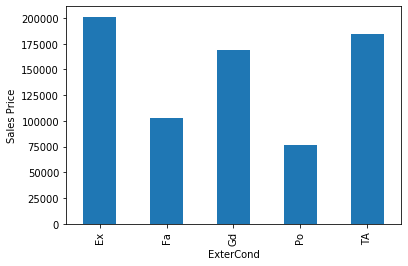

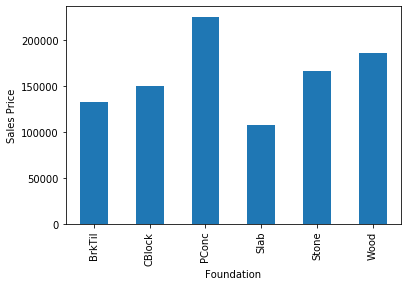

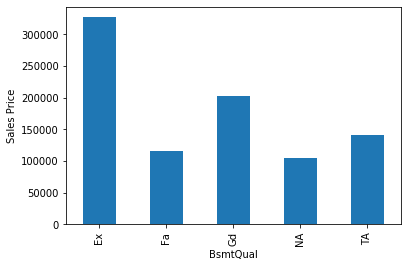

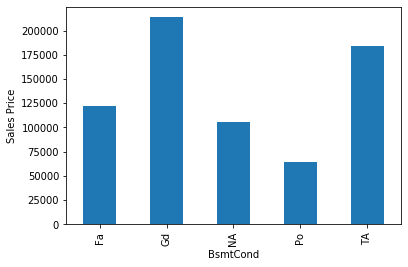

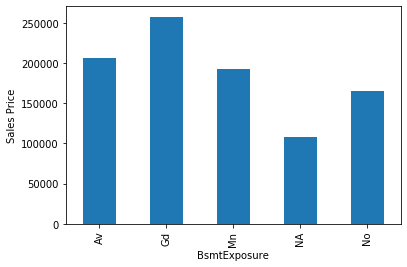

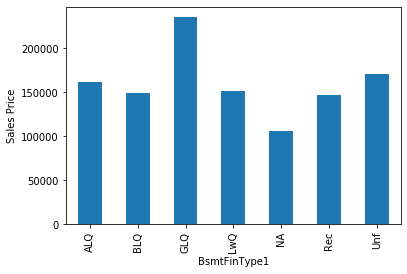

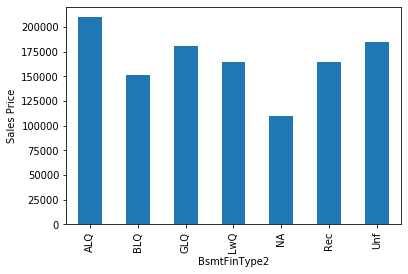

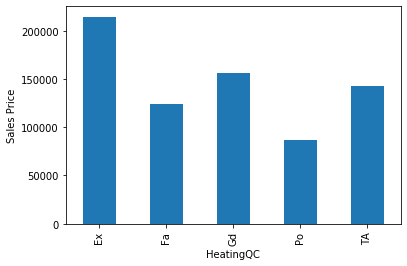

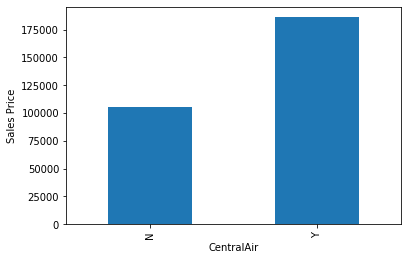

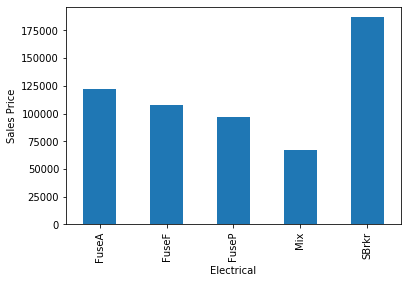

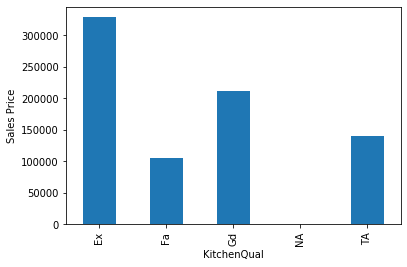

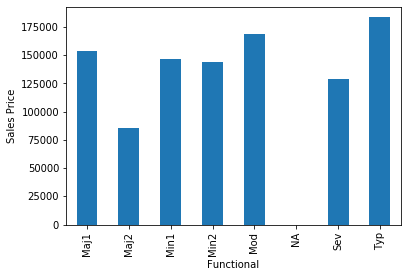

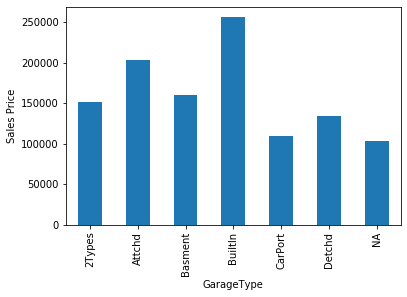

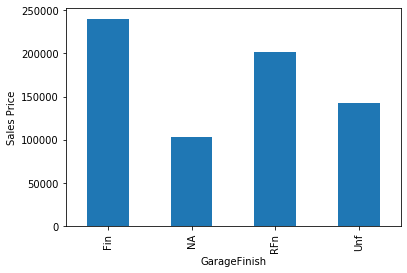

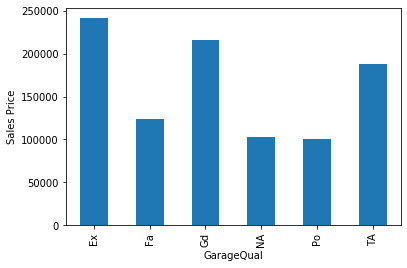

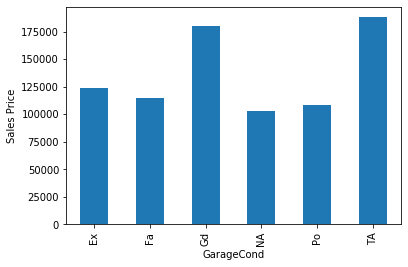

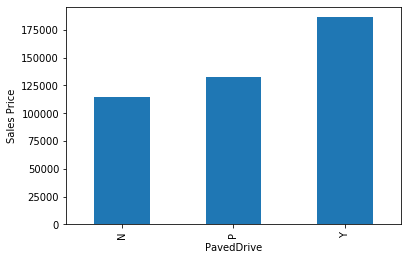

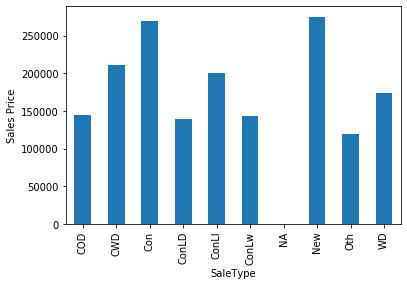

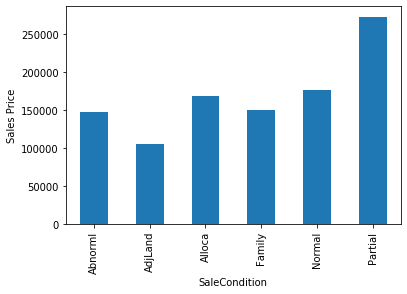

In [11]:
for i in df.select_dtypes('object').columns:
    df.groupby(i)['SalePrice'].mean().plot(kind='bar')
    plt.xlabel(i)
    plt.ylabel('Sales Price')
    plt.xticks(rotation=90)
    plt.show()

Below are some of the few observations from the bar graphs
1. Sale price of "Floating Village Residential" zone is highest followed by "Residential Low Density" zone.
2. Houses on Paved street has higher price as compared to Gravel street.
3. Moderately Irregular shape of the  house increases its price whereas Regular shape houses has lowest price.
4. Hillside houses has higher price.
5. All public utilities makes the house expensive as compared to less public utilities available.
6. Houses in Northridge and Northridge heights neibourhood have high prices whereas in Meadow Village neighbourhood, house prices are cheapest.
7. Houses near Near and Adjacent to positive off-site (park, greenbelt, etc.) have high prices.

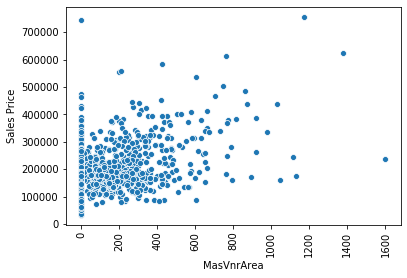

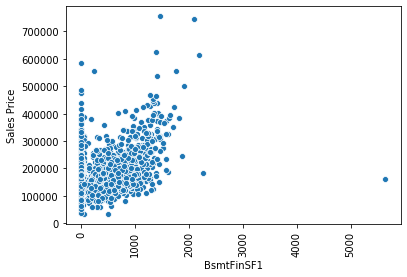

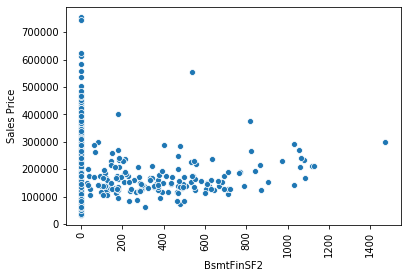

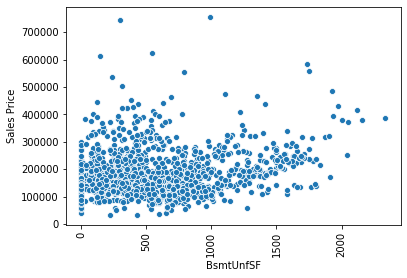

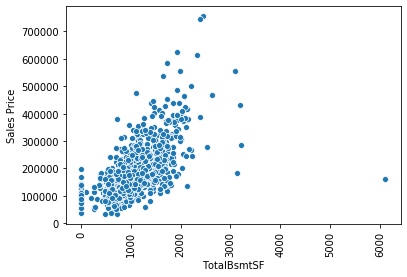

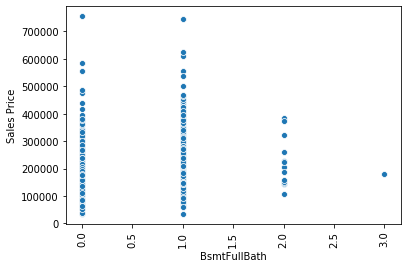

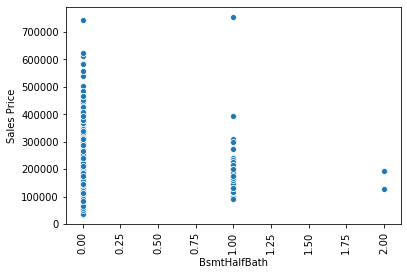

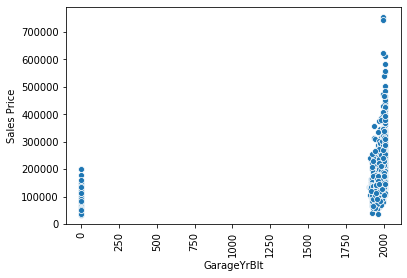

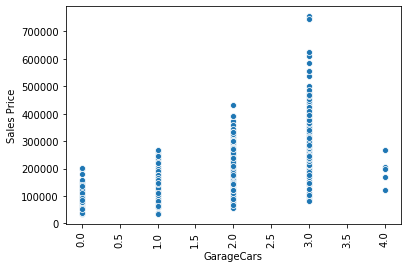

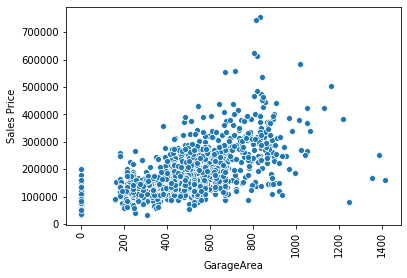

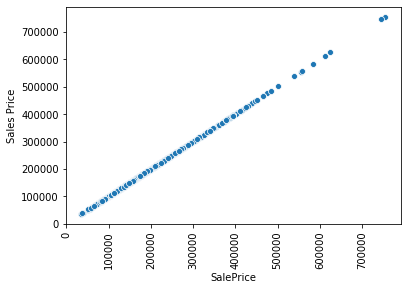

In [12]:
for i in df.select_dtypes('float64').columns:
    sns.scatterplot(x=df[i], y=df['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('Sales Price')
    plt.xticks(rotation=90)
    plt.show()

Making new features out of old ones

In [13]:
df['AgeOfHouse'] = df.YrSold - df.YearBuilt

df['AgeOfHouse'][df['AgeOfHouse']== -1] = 1

C:\Users\Win\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
df.drop(columns = ['YearBuilt', 'YrSold', 'GarageYrBlt'], inplace = True)

## Checking for outliers

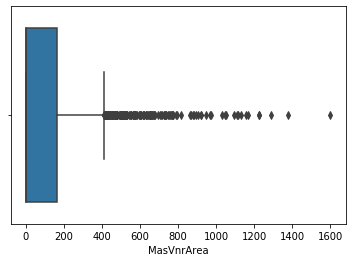

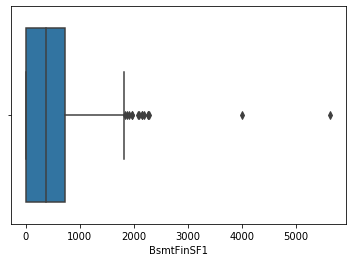

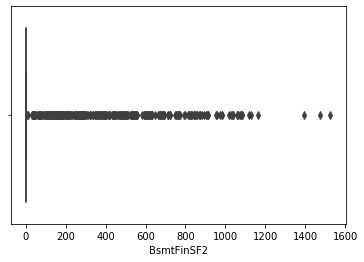

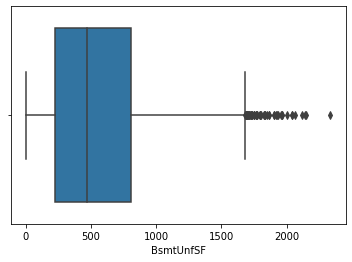

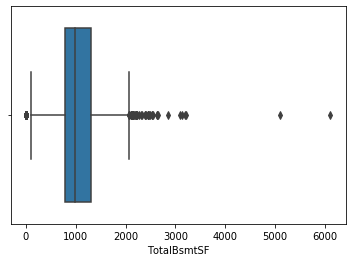

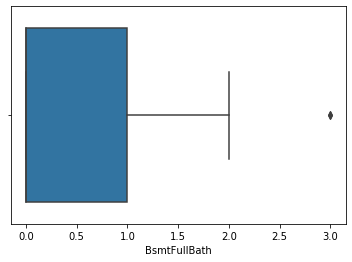

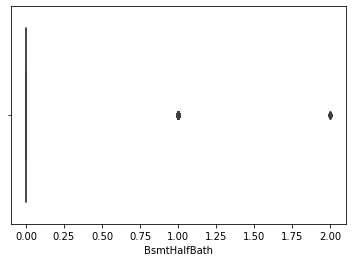

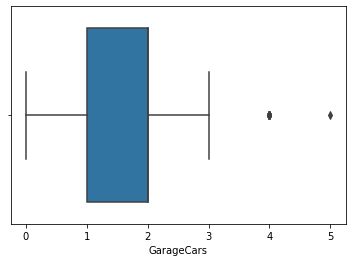

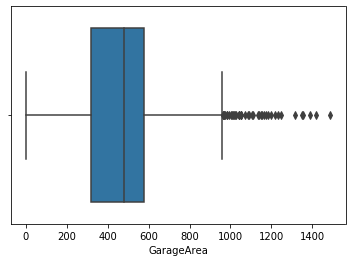

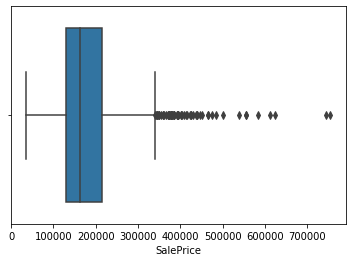

In [15]:
for i in df.columns:
    if((df[i].dtype == 'float64')):
        sns.boxplot(i, data=df)
        plt.show()

In [16]:
cols = []
            
for i in df.columns:
    if((df[i].dtype == 'float64')):
        if((df[i].skew() > 3) and (i != 'SalePrice')):
            cols.append(i)

In [17]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson', standardize=True)
df[cols] = power.fit_transform(df[cols])

for i in df.columns:
    if((df[i].dtype == 'float64')):
        print('Skewness of', i ,'is:', df[i].skew())

Skewness of MasVnrArea is: 2.6144000376778327
Skewness of BsmtFinSF1 is: 1.425722287785458
Skewness of BsmtFinSF2 is: 2.355882053587398
Skewness of BsmtUnfSF is: 0.9193398955310259
Skewness of TotalBsmtSF is: 1.158286632359863
Skewness of BsmtFullBath is: 0.6246079231350885
Skewness of BsmtHalfBath is: 3.7083987835533314
Skewness of GarageCars is: -0.21936105037258777
Skewness of GarageArea is: 0.23901913418924578
Skewness of SalePrice is: 1.8819429948035533


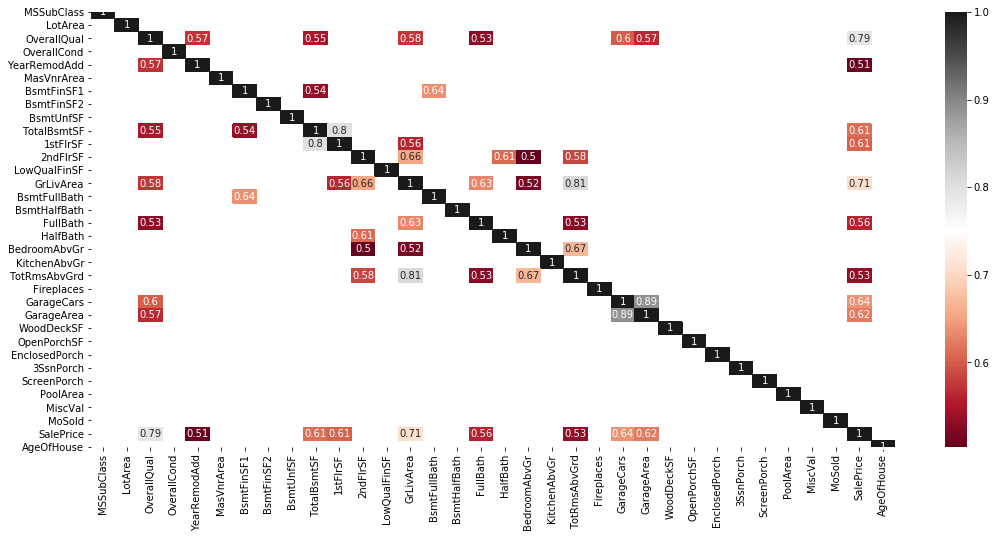

In [18]:
corr = df.corr()

kot = corr[corr>=.5]
plt.figure(figsize=(18,8))
sns.heatmap(kot, cmap="RdGy", annot=True)
plt.show()

Following are the observations from heatmap:

1. GarageCars and GarageArea are highly correlated
2. TotalBsmntSF and 1stFlrSF are highly correlated
3. TotRmsAbvGrd and GrLivArea are highly correlated
4. OverallQual, TotalBsmntSF, 1stFlrSF, GrLivArea, GarageCars and GarageArea are correlated to the target variable.


As there is multicolinearity amongst independent variables or predictors, we need to first take care of that, for that, we will use PCA

In [19]:
ordinal_feature = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

for i in ordinal_feature:
    print(df[i].unique())

['Gd' 'TA' 'Ex' 'NA' 'Fa']
['TA' 'Gd' 'NA' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'NA']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'NA' 'LwQ']
['Unf' 'BLQ' 'NA' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' 'Fa' 'NA']
['RFn' 'Unf' 'Fin' 'NA']
['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']
['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']
['Y' 'N' 'P']


In [20]:
map_col  = {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'RFn':2,'Y':2,'N':0,'P':1,'Fin':3,"No":1,"Mn":2,"Av":3,"Unf":1,"LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

In [21]:
for i in ordinal_feature:
    df[i] = df[i].map(map_col)


For remaining categorical columns, which are not ordinal, we use one-hot encoding

In [22]:
df = pd.get_dummies(df, drop_first = True)

In [23]:
df_train = df[:1459]
df_test = df[1459:]
df_test.drop(columns = 'SalePrice', inplace=True)
print(df_train.shape)
print(df_test.shape)

(1459, 189)
(1459, 188)


C:\Users\Win\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
from sklearn.model_selection import train_test_split

X = df_train.drop(columns = 'SalePrice')
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

from sklearn.model_selection import RandomizedSearchCV

lgbm = lgb.LGBMRegressor(objective='regression')
params = {
    'n_estimators': [5000,10000],
    'num_leaves': [6,8,10,12],
    'learning_rate': [0.01, 0.1],
    'max_bin': [5,10,15],
    'bagging_fraction' : [0.5, 0.75, 1],
    'bagging_freq': [8,9,10,11], 
    'bagging_seed': [4,5,6,7,8],
    'feature_fraction':[0.1,0.2,0.3]}

rsearch = RandomizedSearchCV(lgbm, param_distributions=params, n_iter=100,
                            cv=5, random_state=3, n_jobs=-1, return_train_score=True)

rsearch.fit(X, y)

In [25]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(objective='regression', num_leaves= 10,
 n_estimators= 10000,
 max_bin= 10,
 learning_rate= 0.01,
 feature_fraction= 0.3,
 bagging_seed= 6,
 bagging_freq= 8,
 bagging_fraction= 1)

In [26]:
lgbm.fit(X_train, y_train,eval_metric='rmse')
predict = lgbm.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


In [27]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

print('The rmsle of prediction is:', round(mean_squared_log_error(predict, y_test) ** 0.5, 5))
print('rmse', np.sqrt(mean_squared_error(predict, y_test)))

The rmsle of prediction is: 0.10302
rmse 25157.204211881544


In [28]:
lgbm.fit(X, y,eval_metric='rmse')
y_predict = lgbm.predict(df_test)

[LightGBM] [Warning] feature_fraction is set=0.3, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


In [29]:
y_predict

array([127004.11954826, 169505.63510955, 181024.07424888, ...,
       159593.46220227, 116968.23587571, 200868.67689859])